# Car Insurance Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from collections import Counter
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection  import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier as gbr
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
pwd

'C:\\Users\\CLIENTE'

In [4]:
cd "C:\Users\CLIENTE\Documents\DATASETS\Car Insurance"

C:\Users\CLIENTE\Documents\DATASETS\Car Insurance


In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
pd.set_option('display.max_columns', 50)
df_train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [7]:
df_train.shape

(58592, 44)

A quick Shuffle Just In Case

In [8]:
df_train = df_train.sample(frac = 1)

## Data exploration

In [9]:
# df_train.isna().sum()    
## Data is complete

In [10]:
#df_train.duplicated().sum()
## Data has no duplicates

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


# Clearly a Label Imbalance problem
#### The majority of labels are 0's

Text(0.5, 1.0, 'Y_LABEL')

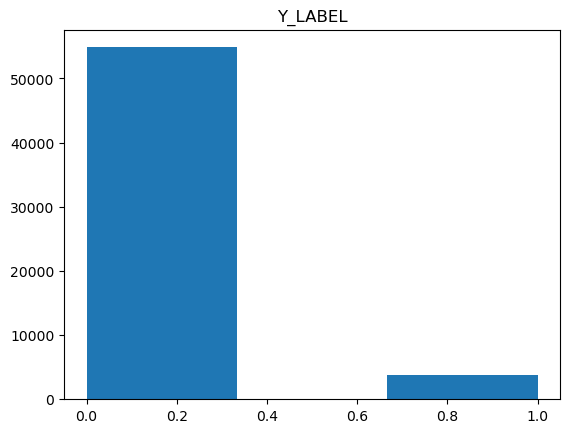

In [12]:
plt.hist(df_train["is_claim"], bins = 3)
plt.xlabel("")
plt.ylabel("")
plt.title("Y_LABEL")

#df_train['is_claim'].value_counts()

We can clearly see that some features are imbalanced

In [13]:
df_train.groupby("age_of_car")[["is_claim"]].describe().T

age_of_car             0.00         0.01         0.02         0.03  \
is_claim count  5257.000000  6362.000000  5189.000000  4415.000000   
         mean      0.106334     0.046369     0.060320     0.061608   
         std       0.308294     0.210300     0.238102     0.240470   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.04         0.05         0.06         0.07  \
is_claim count  3763.000000  3342.000000  3053.000000  2888.000000   
         mean      0.065905     0.067624     0.067475     0.071330   
         std       0.248149     0.251137     0.250883     0.257419   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.08         0.09         0.10         0.11  \
is_claim count  2730.000000  2643.000000  3123.000000  2442.000000   
         mean      0.063736     0.063186     0.068844     0.067977   
         std       0.244327     0.243343     0.253229     0.251758   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.12         0.13         0.14         0.15  \
is_claim count  2506.000000  2315.000000  2151.000000  1964.000000   
         mean      0.061053     0.060475     0.057648     0.044297   
         std       0.239476     0.238417     0.233130     0.205807   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.16        0.17        0.18        0.19        0.20  \
is_claim count  1291.000000  931.000000  738.000000  458.000000  287.000000   
         mean      0.048025    0.042965    0.042005    0.037118    0.052265   
         std       0.213901    0.202886    0.200738    0.189257    0.222949   
         min       0.000000    0.000000    0.000000    0.000000    0.000000   
         25%       0.000000    0.000000    0.000000    0.000000    0.000000   
         50%       0.000000    0.000000    0.000000    0.000000    0.000000   
         75%       0.000000    0.000000    0.000000    0.000000    0.000000   
         max       1.000000    1.000000    1.000000    1.000000    1.000000   

age_of_car           0.21        0.22       0.23  0.24       0.25       0.26  \
is_claim count  172.00000  148.000000  90.000000  65.0  46.000000  24.000000   
         mean     0.05814    0.060811   0.044444   0.0   0.043478   0.041667   
         std      0.23469    0.239794   0.207235   0.0   0.206185   0.204124   
         min      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         25%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         50%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         75%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         max      1.00000    1.000000   1.000000   0.0   1.000000   1.000000   

age_of_car      0.27  0.28  0.29       0.30

In [14]:
df_train.groupby("age_of_car")[['is_claim']].describe().T

age_of_car             0.00         0.01         0.02         0.03  \
is_claim count  5257.000000  6362.000000  5189.000000  4415.000000   
         mean      0.106334     0.046369     0.060320     0.061608   
         std       0.308294     0.210300     0.238102     0.240470   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.04         0.05         0.06         0.07  \
is_claim count  3763.000000  3342.000000  3053.000000  2888.000000   
         mean      0.065905     0.067624     0.067475     0.071330   
         std       0.248149     0.251137     0.250883     0.257419   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.08         0.09         0.10         0.11  \
is_claim count  2730.000000  2643.000000  3123.000000  2442.000000   
         mean      0.063736     0.063186     0.068844     0.067977   
         std       0.244327     0.243343     0.253229     0.251758   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.12         0.13         0.14         0.15  \
is_claim count  2506.000000  2315.000000  2151.000000  1964.000000   
         mean      0.061053     0.060475     0.057648     0.044297   
         std       0.239476     0.238417     0.233130     0.205807   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

age_of_car             0.16        0.17        0.18        0.19        0.20  \
is_claim count  1291.000000  931.000000  738.000000  458.000000  287.000000   
         mean      0.048025    0.042965    0.042005    0.037118    0.052265   
         std       0.213901    0.202886    0.200738    0.189257    0.222949   
         min       0.000000    0.000000    0.000000    0.000000    0.000000   
         25%       0.000000    0.000000    0.000000    0.000000    0.000000   
         50%       0.000000    0.000000    0.000000    0.000000    0.000000   
         75%       0.000000    0.000000    0.000000    0.000000    0.000000   
         max       1.000000    1.000000    1.000000    1.000000    1.000000   

age_of_car           0.21        0.22       0.23  0.24       0.25       0.26  \
is_claim count  172.00000  148.000000  90.000000  65.0  46.000000  24.000000   
         mean     0.05814    0.060811   0.044444   0.0   0.043478   0.041667   
         std      0.23469    0.239794   0.207235   0.0   0.206185   0.204124   
         min      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         25%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         50%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         75%      0.00000    0.000000   0.000000   0.0   0.000000   0.000000   
         max      1.00000    1.000000   1.000000   0.0   1.000000   1.000000   

age_of_car      0.27  0.28  0.29       0.30

Text(0.5, 1.0, 'new_old')

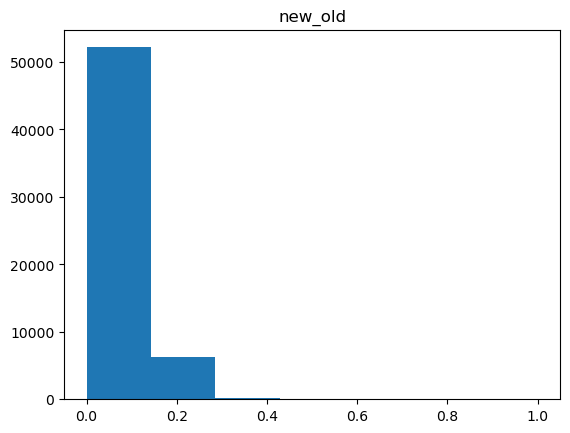

In [15]:
plt.hist(df_train["age_of_car"], bins = 7)
plt.xlabel("")
plt.ylabel("")
plt.title("new_old")

We can see that the age of the car might be a good predictor the newer the car the most likely it is to be "CLAIMED", BUT analyzing a little further we find that the majority of cars are kinda new, so that feature really doesn't tell us anything.

In [16]:
df_train.groupby("segment")[["displacement","is_claim"]].describe().T

segment                        A           B1            B2           C1  \
displacement count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean     823.811270   998.000000   1223.176695  1376.094743   
             std       69.803312     0.000000     84.665109   147.572646   
             min      796.000000   998.000000   1197.000000  1197.000000   
             25%      796.000000   998.000000   1197.000000  1197.000000   
             50%      796.000000   998.000000   1197.000000  1498.000000   
             75%      796.000000   998.000000   1197.000000  1498.000000   
             max      999.000000   998.000000   1497.000000  1498.000000   
is_claim     count  17321.000000  4173.000000  18314.000000  3557.000000   
             mean       0.060389     0.058471      0.068581     0.064099   
             std        0.238213     0.234660      0.252748     0.244964   
             min        0.000000     0.000000      0.000000     0.000000   
             25%        0.000000     0.000000      0.000000     0.000000   
             50%        0.000000     0.000000      0.000000     0.000000   
             75%        0.000000     0.000000      0.000000     0.000000   
             max        1.000000     1.000000      1.000000     1.000000   

segment                       C2      Utility  
displacement count  14018.000000  1209.000000  
             mean    1493.000000  1196.000000  
             std        0.000000     0.000000  
             min     1493.000000  1196.000000  
             25%     1493.000000  1196.000000  
             50%     1493.000000  1196.000000  
             75%     1493.000000  1196.000000  
             max     1493.000000  1196.000000  
is_claim     count  14018.000000  1209.000000  
             mean       0.064275     0.060380  
             std        0.245250     0.238289  
             min        0.000000     0.000000  
             25%        0.000000     0.000000  
             50%        0.000000     0.000000  
             75%        0.000000     0.000000  
             max        1.000000     1.000000

Text(0.5, 1.0, 'carro_ficho_o_no')

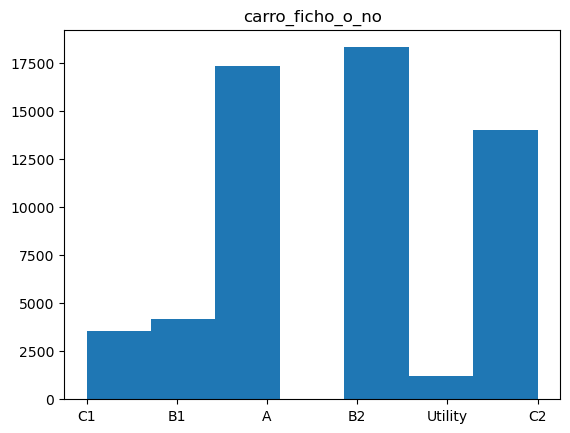

In [17]:
plt.hist(df_train["segment"], bins = 7)
plt.xlabel("")
plt.ylabel("")
plt.title("carro_ficho_o_no")

In [18]:
df_train.groupby("make")[["is_claim"]].describe().T

make                       1            2             3            4  \
is_claim count  38126.000000  2373.000000  14018.000000  1961.000000   
         mean       0.064392     0.053940      0.064275     0.066803   
         std        0.245453     0.225947      0.245250     0.249744   
         min        0.000000     0.000000      0.000000     0.000000   
         25%        0.000000     0.000000      0.000000     0.000000   
         50%        0.000000     0.000000      0.000000     0.000000   
         75%        0.000000     0.000000      0.000000     0.000000   
         max        1.000000     1.000000      1.000000     1.000000   

make                      5  
is_claim count  2114.000000  
         mean      0.062914  
         std       0.242865  
         min       0.000000  
         25%       0.000000  
         50%       0.000000  
         75%       0.000000  
         max       1.000000

Text(0.5, 1.0, 'Marca')

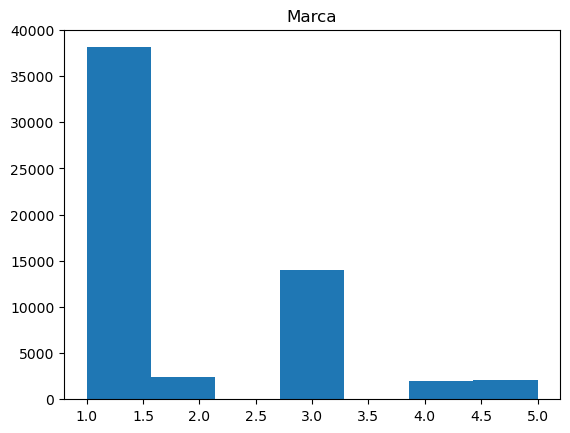

In [19]:
plt.hist(df_train["make"], bins = 7)
plt.xlabel("")
plt.ylabel("")
plt.title("Marca")

Text(0.5, 1.0, 'displacement')

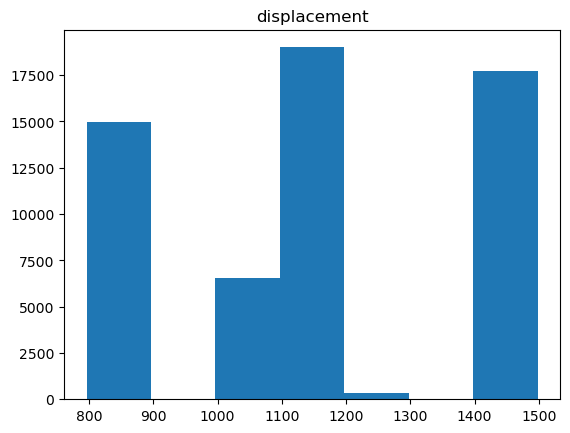

In [20]:
plt.hist(df_train["displacement"], bins = 7)
plt.xlabel("")
plt.ylabel("")
plt.title("displacement")

In [21]:
df_train.groupby("area_cluster")[["is_claim"]].describe().T

area_cluster             C1          C10          C11          C12  \
is_claim count  1468.000000  3155.000000  1212.000000  1589.000000   
         mean      0.051771     0.046910     0.059406     0.054751   
         std       0.221640     0.211479     0.236480     0.227566   
         min       0.000000     0.000000     0.000000     0.000000   
         25%       0.000000     0.000000     0.000000     0.000000   
         50%       0.000000     0.000000     0.000000     0.000000   
         75%       0.000000     0.000000     0.000000     0.000000   
         max       1.000000     1.000000     1.000000     1.000000   

area_cluster            C13          C14         C15         C16         C17  \
is_claim count  3423.000000  3660.000000  771.000000  401.000000  492.000000   
         mean      0.056968     0.076776    0.049287    0.057357    0.038618   
         std       0.231815     0.266272    0.216606    0.232813    0.192879   
         min       0.000000     0.000000    0.000000    0.000000    0.000000   
         25%       0.000000     0.000000    0.000000    0.000000    0.000000   
         50%       0.000000     0.000000    0.000000    0.000000    0.000000   
         75%       0.000000     0.000000    0.000000    0.000000    0.000000   
         max       1.000000     1.000000    1.000000    1.000000    1.000000   

area_cluster           C18        C19           C2         C20         C21  \
is_claim count  242.000000  952.00000  7342.000000  109.000000  379.000000   
         mean     0.107438    0.07458     0.070825    0.045872    0.076517   
         std      0.310311    0.26285     0.256550    0.210173    0.266175   
         min      0.000000    0.00000     0.000000    0.000000    0.000000   
         25%      0.000000    0.00000     0.000000    0.000000    0.000000   
         50%      0.000000    0.00000     0.000000    0.000000    0.000000   
         75%      0.000000    0.00000     0.000000    0.000000    0.000000   
         max      1.000000    1.00000     1.000000    1.000000    1.000000   

area_cluster           C22           C3          C4           C5          C6  \
is_claim count  207.000000  6101.000000  665.000000  6979.000000  890.000000   
         mean     0.082126     0.070972    0.076692     0.057745    0.061798   
         std      0.275222     0.256799    0.266302     0.233277    0.240923   
         min      0.000000     0.000000    0.000000     0.000000    0.000000   
         25%      0.000000     0.000000    0.000000     0.000000    0.000000   
         50%      0.000000     0.000000    0.000000     0.000000    0.000000   
         75%      0.000000     0.000000    0.000000     0.000000    0.000000   
         max      1.000000     1.000000    1.000000     1.000000    1.000000   

area_cluster             C7            C8           C9  
is_claim count  2167.000000  13654.000000  2734.000000  
         mean      0.050300      0.069870     0.049744  
         std       0.218614      0.254937     0.217455  
         min       0.000000      0.000000     0.000000  
         25%       0.000000      0.000000     0.000000  
         50%       0.000000      0.000000     0.000000  
         75%       0.000000      0.000000     0.000000  
         max       1.000000      1.000000     1.000000

Text(0.5, 1.0, 'area_cluster')

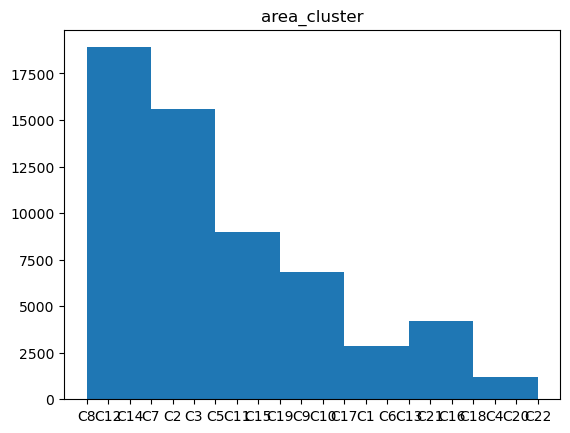

In [22]:
plt.hist(df_train["area_cluster"], bins = 7)
plt.xlabel("")
plt.ylabel("")
plt.title("area_cluster")

<Axes: xlabel='age_of_car'>

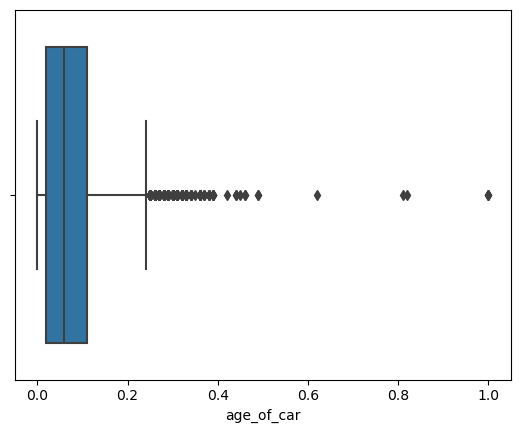

In [23]:
sns.boxplot(x='age_of_car', data=df_train)
## We can and should remove this outliers

###### Lets see how the categorical data is distributed

In [24]:
Categorical = df_train[["area_cluster","segment","model","fuel_type","max_torque","max_power","engine_type","is_esc","is_adjustable_steering",
"is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert"]]

In [25]:
for i in Categorical:
    print(Categorical[i].value_counts())
    print("*"*30)

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
******************************
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
******************************
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
******************************
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
******************************
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm

## CURSE OF DIMENSIONALITY

#### This dataset contains many features, maybe we'll face the "Curse of Dimensionality". We need to apply a PCA, in order to reduce the # of features. Usually the curse of dimensionality happens when there are too many features

# Preprocessing the data

##### First we will unite  a couple of features that aren't useful by themselves

In [26]:
df_train['volume'] = np.log(df_train.length.astype('int64') * df_train.width * df_train.height * 1e-6)
df_train = df_train.drop(['length', 'width', 'height'], axis=1)


In [27]:
# Test
df_test['volume'] = np.log(df_test.length.astype('int64') * df_test.width * df_test.height * 1e-6)
df_test = df_test.drop(['length', 'width', 'height'], axis=1)

In [28]:
df_train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,volume
37335,ID37336,1.005369,0.05,0.336538,C8,8794,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,2,No,Yes,No,Yes,Yes,Drum,1498,4,Manual,5,Electric,4.9,1051,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0,9.226613
48226,ID48227,1.179059,0.15,0.384615,C12,34791,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2,No,No,No,Yes,No,Drum,998,3,Manual,5,Power,4.7,1340,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0,9.202091


##### Remove outliers.

We'll remove the outliers later, because after concating DF's is throwing NA's. 

Number of extreme values to be removed:  269
Number of negative examples will be lost:  260
Number of positive examples will be lost:  9


<Axes: xlabel='age_of_car'>

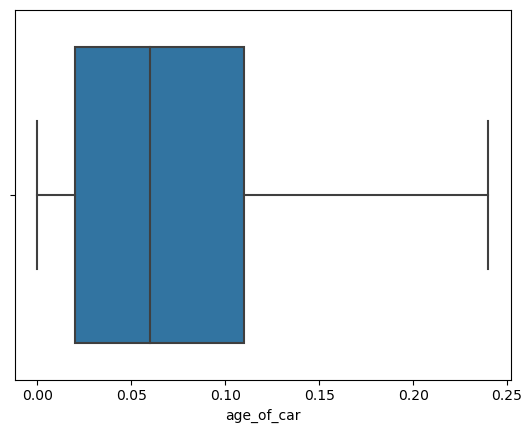

In [29]:
extreme_age_of_car_indices = df_train.age_of_car > df_train.age_of_car.quantile(0.995)
extreme_is_claim_counts = Counter(df_train.loc[extreme_age_of_car_indices].is_claim)
print("Number of extreme values to be removed: ", sum(extreme_age_of_car_indices))
print("Number of negative examples will be lost: ", extreme_is_claim_counts.get(0))
print("Number of positive examples will be lost: ", extreme_is_claim_counts.get(1))
sns.boxplot(x='age_of_car', data=df_train.loc[~extreme_age_of_car_indices])

In [30]:
df_train.shape

(58592, 42)

### Encoding the data

Creating a Dummy DF

In [31]:
#Train
df_dummy = df_train.copy()

#Test
df_dummy_t = df_test.copy() ### This test

In [32]:
df_dummy.shape

(58592, 42)

In [33]:
#TrainDF, the columns to which we are going to apply LABEL ENCODER: CATEGORICAL FEATURES
df_dummy_0 = df_dummy[["area_cluster","segment","model","fuel_type","max_torque","max_power","engine_type","is_esc","is_adjustable_steering",
"is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert"]]

#TestDF, the columns to which we are going to apply LABEL ENCODER: CATEGORICAL FEATURES
df_dummy_t_0 = df_dummy_t[["area_cluster","segment","model","fuel_type","max_torque","max_power","engine_type","is_esc","is_adjustable_steering",
"is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert"]]

In [34]:
df_dummy_0.shape

(58592, 27)

In [35]:
df_dummy.shape

(58592, 42)

In [36]:
#TrainDF, The columns taht we need to rescue to Concat Later with the LabelEncoded columns from above
df_features = df_dummy.drop(["area_cluster","segment","model","fuel_type","max_torque","max_power","engine_type","is_esc","is_adjustable_steering",
"is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert"], axis=1, inplace=False)

#TestDF, The columns taht we need to rescue to Concat Later with the LabelEncoded columns from above
df_features_t = df_dummy_t.drop(["area_cluster","segment","model","fuel_type","max_torque","max_power","engine_type","is_esc","is_adjustable_steering",
"is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert"], axis=1, inplace=False)

In [37]:
df_dummy_0.shape

(58592, 27)

In [38]:
df_labeled = df_dummy_0.apply(LabelEncoder().fit_transform)
df_labeled_t = df_dummy_t_0.apply(LabelEncoder().fit_transform)

In [39]:
#df_labeled.isna().sum()

In [40]:
df_labeled.head(2)

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
37335,20,3,10,1,2,8,10,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1
48226,3,1,9,0,6,3,9,0,0,0,1,0,1,1,2,0,0,0,0,0,1,1,1,0,0,1,1


A little bit of EDA on the labeled DS

In [41]:
df_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
area_cluster,58592.0,13.035653,6.803915,0.0,6.0,15.0,20.0,21.0
segment,58592.0,1.938644,1.566329,0.0,0.0,2.0,4.0,5.0
model,58592.0,4.659237,3.197355,0.0,0.0,5.0,7.0,10.0
fuel_type,58592.0,1.003448,0.835104,0.0,0.0,1.0,2.0,2.0
max_torque,58592.0,3.288538,2.440212,0.0,0.0,4.0,5.0,8.0
max_power,58592.0,3.317057,2.566569,0.0,2.0,2.0,6.0,8.0
engine_type,58592.0,5.502748,2.684796,0.0,3.0,6.0,8.0,10.0
is_esc,58592.0,0.314053,0.464142,0.0,0.0,0.0,1.0,1.0
is_adjustable_steering,58592.0,0.606329,0.488568,0.0,0.0,1.0,1.0,1.0
is_tpms,58592.0,0.239248,0.426628,0.0,0.0,0.0,0.0,1.0


In [42]:
df_labeled.shape

(58592, 27)

We join the features df with the df to which we applied the label encoder.
so we get a new DF with 0 strings and weird stuff.

In [43]:
df_train_1 = pd.concat([df_features,df_labeled],axis = 1)
df_test_1 = pd.concat([df_features_t,df_labeled_t],axis = 1)

In [44]:
df_train_1.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,is_claim,volume,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
37335,ID37336,1.005369,0.05,0.336538,8794,5,2,1498,4,5,4.9,1051,4,0,9.226613,20,3,10,1,2,8,10,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1
48226,ID48227,1.179059,0.15,0.384615,34791,1,2,998,3,5,4.7,1340,2,0,9.202091,3,1,9,0,6,3,9,0,0,0,1,0,1,1,2,0,0,0,0,0,1,1,1,0,0,1,1
7774,ID07775,0.648231,0.10,0.500000,7788,1,2,796,3,5,4.6,1185,0,0,8.948753,5,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
df_train_1.shape

(58592, 42)

In [46]:
#df_train_1.isna().sum()

In [47]:
df_test_1.head(3)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,volume,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID58593,0.341732,0.00,0.586538,4076,1,2,796,3,5,4.6,1185,0,8.948753,15,0,0,0,5,2,6,0,0,0,1,0,1,1,2,0,0,0,0,0,0,0,1,0,0,0,1
1,ID58594,0.307241,0.13,0.442308,8794,1,2,1197,4,5,4.8,1335,2,9.230804,20,2,7,2,0,6,8,0,1,0,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1
2,ID58595,0.327924,0.12,0.451923,8794,2,2,999,3,5,5.0,1155,2,9.079999,20,0,4,2,8,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1


## Normalize the data

Normalizing train_df

In [48]:
# We'll only normalize this columns
df_pre_train_1= df_train_1[["population_density","displacement","make","airbags","cylinder","gear_box","turning_radius",
                            "gross_weight","ncap_rating","area_cluster","segment",
                            "model","fuel_type","max_torque","max_power","engine_type",
                            "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert","volume"]]

# We'll separate the dataframe so later we can concat it (Normaloized DS with the DS that doesnt need normalization)
df_pre_train_1_2 = df_train_1.drop(["population_density","displacement","make","airbags","cylinder","gear_box","turning_radius",
                            "gross_weight","ncap_rating","area_cluster","segment",
                            "model","fuel_type","max_torque","max_power","engine_type",
                            "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert","volume"], axis=1, inplace=False)

Normalizing test_df

In [49]:
# We'll only normalize this columns
df_pre_test_1= df_test_1[["population_density","displacement","make","airbags","cylinder","gear_box","turning_radius",
                            "gross_weight","ncap_rating","area_cluster","segment",
                            "model","fuel_type","max_torque","max_power","engine_type",
                            "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert","volume"]]

# We'll separate the dataframe so later we can concat it
df_pre_test_1_2 = df_test_1.drop(["population_density","displacement","make","airbags","cylinder","gear_box","turning_radius",
                            "gross_weight","ncap_rating","area_cluster","segment",
                            "model","fuel_type","max_torque","max_power","engine_type",
                            "is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","transmission_type","steering_type",
"is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger",
"is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable",
"is_day_night_rear_view_mirror","is_ecw","is_speed_alert","volume"], axis=1, inplace=False)

In [50]:
df_pre_train_1_2.isna().sum()

policy_id              0
policy_tenure          0
age_of_car             0
age_of_policyholder    0
is_claim               0
dtype: int64

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()

In [52]:
## Train 
train_df_norm_t = min_max_scaler.fit_transform(df_pre_train_1)
train_df_norm_t = pd.DataFrame(train_df_norm_t, columns = df_pre_train_1.columns)

## Test
test_df_norm_t = min_max_scaler.fit_transform(df_pre_test_1)
test_df_norm_t = pd.DataFrame(test_df_norm_t,columns = df_pre_test_1.columns)

In [53]:
train_df_norm_t.shape

(58592, 37)

In [54]:
#train_df_norm_t.isna().sum()

In [55]:
train_df_norm_t.shape

(58592, 37)

In [56]:
#df_pre_train_1_2.isna().sum()

In [57]:
train_df_norm_t.shape

(58592, 37)

In [58]:
#train_df_norm_t.tail(2)

In [59]:
#df_pre_train_1_2.shape

In [60]:
#df_pre_train_1_2.tail(2)

#### Volvemos a concatenar los dataframes

In [61]:
df_train_2 = pd.concat([train_df_norm_t, df_pre_train_1_2],axis = 1)

df_test_2 = pd.concat([test_df_norm_t, df_pre_test_1_2],axis = 1)

In [62]:
df_train_2.head(2)

,population_density,displacement,make,airbags,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,volume,policy_id,policy_tenure,age_of_car,age_of_policyholder,is_claim
0,0.116270,1.000000,1.0,0.2,1.0,0.0,0.571429,0.000000,0.8,0.952381,0.6,1.0,0.5,0.25,1.000,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.565359,ID00001,0.515874,0.05,0.644231,0
1,0.471712,0.287749,0.0,0.2,0.0,0.0,0.285714,0.431988,0.4,0.142857,0.2,0.9,0.0,0.75,0.375,0.9,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.515464,ID00002,0.672619,0.02,0.375000,0


In [63]:
df_train_2.shape

(58592, 42)

### NOW we get rid of the OUTLIERS

Removing the otuliers before this previous step and after the EDA gave me a headache when I concated teh dataframes in the Normalization Step. Becasue it throwed me NAN values and the shape of the Dataframe changed somehow. So in order to avoid that problem I decided to keep it simple and do the outliers removal in this step, nconventional but effective 

In [64]:
#df_train_2.isna().sum()

In [65]:
df_train_2.loc[df_train_2.age_of_car>0.2,"age_of_car"]=np.nan

In [66]:
df_train_2.isna().sum()

population_density                    0
displacement                          0
make                                  0
airbags                               0
cylinder                              0
gear_box                              0
turning_radius                        0
gross_weight                          0
ncap_rating                           0
area_cluster                          0
segment                               0
model                                 0
fuel_type                             0
max_torque                            0
max_power                             0
engine_type                           0
is_esc                                0
is_adjustable_steering                0
is_tpms                               0
is_parking_sensors                    0
is_parking_camera                     0
rear_brakes_type                      0
transmission_type                     0
steering_type                         0
is_front_fog_lights                   0


In [67]:
df_train_2.shape

(58592, 42)

In [68]:
df_train_2 = df_train_2.dropna(subset=["age_of_car"])

In [69]:
#df_train_2.isna().sum()

In [70]:
df_train_2.shape

(57848, 42)

## Time to solve the Class Imbalance

Due to the lack of "Y = 1" (claimed<) in the Test DF. we'll split the TrainDF to later see the score

In [71]:
from sklearn.model_selection  import train_test_split

In [72]:
df_train_Y = df_train_2[["is_claim"]]
df_train_X = df_train_2.drop(["policy_id","is_claim"], axis=1)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(df_train_X, df_train_Y, test_size=0.25,random_state=0)

#### In order to avoid any OVERFITTING we'll only apply the RESAMPLE to the TRAINING SET

Thats why we apply the Train Test SPlit in this Step.

In [74]:
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import RandomOverSampler

Also to avoid to UPSAMPLE too much the LABELS I will only use a portion of the whole Training DS

And then i'll undersample the Majority Data

In [75]:
X_train.shape

(43386, 40)

In [76]:
df1_x = X_train.iloc[:12000,:]
df1_y = y_train.iloc[:12000,:]

df2_x = X_train.iloc[12000:,:]
df2_y = y_train.iloc[12000:,:]

In [77]:
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(df1_x,df1_y)

Text(0.5, 1.0, 'Y_after_UPSAMPLE')

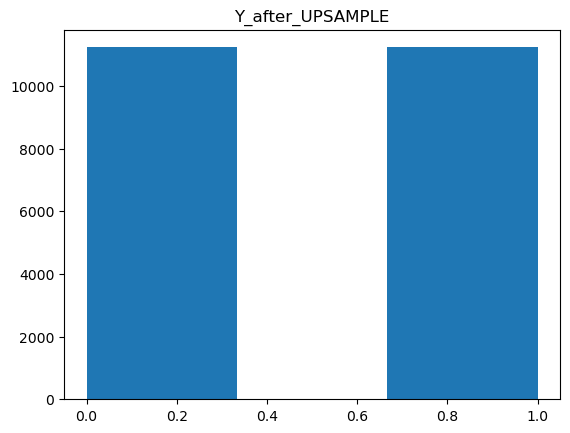

In [78]:
plt.hist(y_resampled["is_claim"], bins = 3)
plt.xlabel("")
plt.ylabel("")
plt.title("Y_after_UPSAMPLE")

In [79]:
## Concat by ROWS now the X_resample with the X no resampled, same with the Y's
df_x_1 = pd.concat([x_resampled,df2_x],axis = 0)
df_y_1 = pd.concat([y_resampled,df2_y],axis = 0)

Text(0.5, 1.0, 'Y_after_UPSAMPLE')

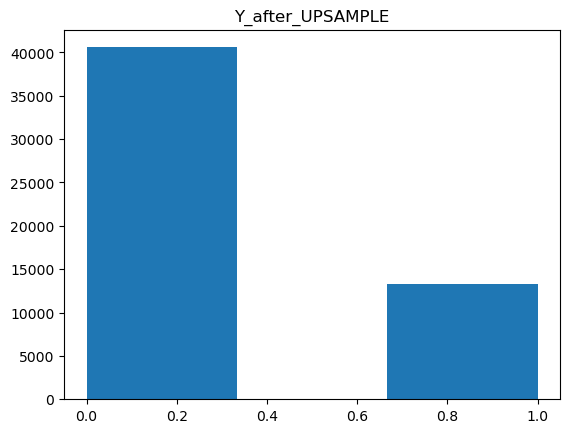

In [80]:
plt.hist(df_y_1["is_claim"], bins = 3)
plt.xlabel("")
plt.ylabel("")
plt.title("Y_after_UPSAMPLE")

In [81]:
df_y_1.shape

(53846, 1)

Now we will undersample the majority class

In [82]:
## We concat the columns Y and X
df_reduce = pd.concat([df_y_1,df_x_1],axis = 1)

In [83]:
## Order the dataset by "IS_CLAIM" in order to quickly reduce the dataset by using ILOC
reducing_DF = df_reduce.sort_values(by=['is_claim'])

In [84]:
reducing_DF

,is_claim,population_density,displacement,make,airbags,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,volume,policy_tenure,age_of_car,age_of_policyholder
0,0,0.000000,0.000000,0.00,0.2,0.0,0.0,0.142857,0.200299,0.0,0.285714,0.0,0.0,0.0,0.625,0.250,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.166959,0.19,0.480769
18259,0,0.291660,0.287749,0.00,0.2,0.0,0.0,0.285714,0.431988,0.4,0.761905,0.2,0.9,0.0,0.750,0.375,0.9,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.515464,0.290637,0.03,0.307692
17915,0,0.470987,0.000000,0.00,0.2,0.0,0.0,0.142857,0.200299,0.0,0.809524,0.0,0.0,0.0,0.625,0.250,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.011224,0.12,0.634615
10489,0,0.051764,0.000000,0.00,0.2,0.0,0.0,0.142857,0.200299,0.0,0.714286,0.0,0.0,0.0,0.625,0.250,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.080288,0.03,0.355769
35120,0,0.079601,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.904762,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.150531,0.16,0.548077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16988,1,0.116270,0.289174,0.25,0.2,0.0,0.0,0.714286,0.155456,0.4,0.952381,0.0,0.4,1.0,1.000,0.625,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.267046,1.163662,0.05,0.586538
16989,1,0.079601,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.904762,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.022461,0.06,0.413462
16990,1,0.051764,0.571225,0.00,1.0,1.0,0.0,0.500000,0.536622,0.0,0.714286,0.4,0.8,1.0,0.000,0.750,0.1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.620607,0.600085,0.01,0.480769
16965,1,0.365231,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.523810,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.133940,0.11,0.480769


We'll  undersample a couple thousand, We get rid of the first rows 

In [85]:
df_final = reducing_DF.iloc[2100:,:]

In [86]:
df_final

,is_claim,population_density,displacement,make,airbags,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,volume,policy_tenure,age_of_car,age_of_policyholder
32939,0,0.064260,0.000000,0.00,0.2,0.0,0.0,0.142857,0.200299,0.0,0.000000,0.0,0.0,0.0,0.625,0.250,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.135005,0.06,0.644231
15864,0,0.365231,0.000000,0.00,0.2,0.0,0.0,0.142857,0.200299,0.0,0.523810,0.0,0.0,0.0,0.625,0.250,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.072162,0.00,0.317308
22075,0,0.470987,0.571225,0.00,1.0,1.0,0.0,0.500000,0.536622,0.0,0.809524,0.4,0.8,1.0,0.000,0.750,0.1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.620607,1.023680,0.12,0.461538
43012,0,0.470987,0.287749,0.00,0.2,0.0,0.0,0.285714,0.431988,0.4,0.809524,0.2,0.9,0.0,0.750,0.375,0.9,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.515464,0.316508,0.06,0.480769
17755,0,0.116270,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.952381,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,0.403721,0.02,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16988,1,0.116270,0.289174,0.25,0.2,0.0,0.0,0.714286,0.155456,0.4,0.952381,0.0,0.4,1.0,1.000,0.625,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.267046,1.163662,0.05,0.586538
16989,1,0.079601,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.904762,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.022461,0.06,0.413462
16990,1,0.051764,0.571225,0.00,1.0,1.0,0.0,0.500000,0.536622,0.0,0.714286,0.4,0.8,1.0,0.000,0.750,0.1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.620607,0.600085,0.01,0.480769
16965,1,0.365231,0.992877,0.50,1.0,1.0,1.0,1.000000,1.000000,0.6,0.523810,0.8,0.5,0.5,0.500,0.000,0.3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.000000,1.133940,0.11,0.480769


Shuffle the data

In [87]:
df_final = df_final.sample(frac = 1)

Text(0.5, 1.0, 'Y_after_UNDERSAMPLE')

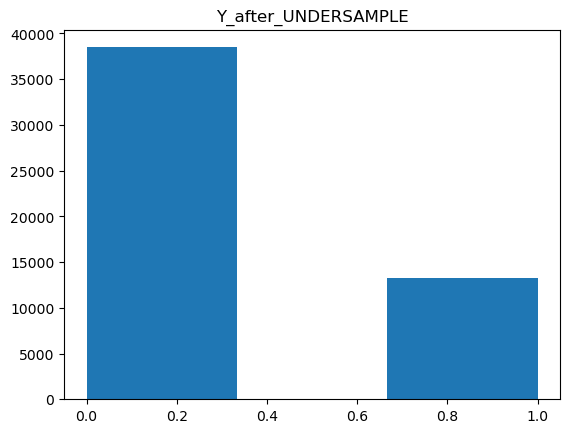

In [88]:
plt.hist(df_final["is_claim"], bins = 3)
plt.xlabel("")
plt.ylabel("")
plt.title("Y_after_UNDERSAMPLE")

In [89]:
df_final.shape

(51746, 41)

In [90]:
df_final.head(2)

,is_claim,population_density,displacement,make,airbags,cylinder,gear_box,turning_radius,gross_weight,ncap_rating,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,volume,policy_tenure,age_of_car,age_of_policyholder
4238,0,0.102516,0.000000,0.0,0.2,0.0,0.0,0.142857,0.200299,0.0,0.238095,0.0,0.0,0.0,0.625,0.25,0.6,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.081040,0.14,0.336538
15987,1,0.375335,0.571225,0.0,0.2,1.0,0.0,0.428571,0.424514,0.4,0.476190,0.6,0.3,1.0,0.000,0.75,0.2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.631707,1.157666,0.04,0.615385


## Applying PCA
Due to the big amount of features I decided to avoid using many features that can cause a curse of dimensionality or seize many computational resources

In [91]:
from sklearn.decomposition import PCA

In [92]:
Y= df_final[["is_claim"]]
X= df_final.drop(["is_claim"],axis=1)

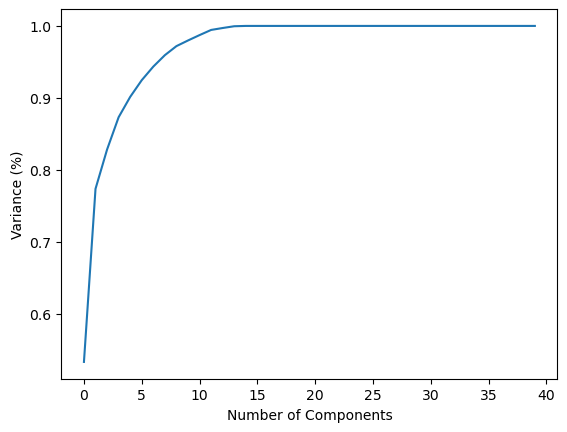

In [93]:
#Fitting the PCA algorithm with our Data
X_PCA = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(X_PCA.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

We only need to reduce to 15.

In [94]:
X_PCA.explained_variance_ratio_

array([5.32714231e-01, 2.40739158e-01, 5.46469023e-02, 4.49520190e-02,
       2.82795213e-02, 2.32450557e-02, 1.88779083e-02, 1.58996690e-02,
       1.25584216e-02, 7.85083853e-03, 7.48954890e-03, 7.16653129e-03,
       2.68109806e-03, 2.46056269e-03, 4.38534085e-04, 4.52962731e-29,
       1.96574835e-29, 1.52790517e-29, 8.08482836e-30, 4.08069267e-30,
       2.75405680e-30, 1.94588179e-30, 1.43121449e-30, 4.80319101e-31,
       2.88721769e-31, 2.53125627e-31, 6.95728068e-32, 2.81773390e-32,
       8.78339691e-33, 3.72478137e-33, 3.72478137e-33, 3.72478137e-33,
       3.72478137e-33, 3.72478137e-33, 3.72478137e-33, 3.72478137e-33,
       3.72478137e-33, 3.72478137e-33, 3.72478137e-33, 2.96560128e-34])

In [95]:
X_PCA_1 = X_PCA.transform(X)
### para ver usando las 45

In [96]:
X_PCA_1

array([[-2.27860034e+00, -9.68104656e-01, -2.42184566e-01, ...,
         1.28174324e-16,  6.73317159e-17, -1.90359043e-16],
       [ 9.97182960e-01,  1.09446735e+00,  4.67524361e-01, ...,
         2.55499862e-17,  1.34928592e-17, -6.30715906e-17],
       [-2.27845401e+00, -9.71483644e-01, -2.26098836e-01, ...,
         1.28410113e-16,  6.67117106e-17, -2.29468598e-16],
       ...,
       [ 8.04811767e-02,  1.78230421e+00, -4.24143955e-01, ...,
        -1.50943208e-18,  1.52040468e-17,  3.53308651e-16],
       [ 2.49400507e+00, -1.13676438e+00, -1.09825727e-01, ...,
         1.25387726e-17, -5.16994546e-17, -1.36200810e-16],
       [-2.28347375e+00, -9.77135398e-01, -2.10418141e-01, ...,
         1.30235425e-16,  6.57073553e-17, -3.10600139e-16]])

In [97]:
pca_0=PCA(n_components=15)

In [98]:
pca_0.fit(X)

PCA(n_components=15)

In [99]:
x_pca_0 =pca_0.transform(X)

This are going to be the features we'll use to train the model.

In [100]:
x_pca_0

array([[-2.27860034, -0.96810466, -0.24218457, ...,  0.00265065,
        -0.10995585,  0.08357406],
       [ 0.99718296,  1.09446735,  0.46752436, ..., -0.75166945,
         0.08247096, -0.03525873],
       [-2.27845401, -0.97148364, -0.22609884, ..., -0.00511413,
         0.12650117, -0.05139708],
       ...,
       [ 0.08048118,  1.78230421, -0.42414395, ...,  0.02121634,
        -0.13338355,  0.00597284],
       [ 2.49400507, -1.13676438, -0.10982573, ..., -0.01405352,
         0.13636566, -0.00416253],
       [-2.28347375, -0.9771354 , -0.21041814, ..., -0.00728623,
         0.08136906,  0.05722642]])

In [101]:
pca_0.explained_variance_ratio_

array([5.32714231e-01, 2.40739158e-01, 5.46469023e-02, 4.49520190e-02,
       2.82795213e-02, 2.32450557e-02, 1.88779083e-02, 1.58996690e-02,
       1.25584216e-02, 7.85083853e-03, 7.48954890e-03, 7.16653129e-03,
       2.68109806e-03, 2.46056269e-03, 4.38534085e-04])

### Apply PCA to the TEST DS


In [102]:
df_test_new = pca_0.transform(X_test)

In [103]:
df_test_new

array([[ 2.49425939e+00, -1.13690578e+00, -1.09930942e-01, ...,
        -2.03722214e-03, -1.70707015e-01, -3.37779057e-02],
       [ 2.49280847e+00, -1.13695364e+00, -1.10197624e-01, ...,
        -2.48330085e-02,  3.68532451e-01, -1.63583691e-02],
       [ 2.48661258e+00, -1.14396420e+00, -9.32238739e-02, ...,
        -7.87561658e-03, -1.26775478e-02, -1.68132971e-02],
       ...,
       [-2.27676276e+00, -9.67393788e-01, -2.39378698e-01, ...,
        -1.52089758e-02,  1.54740145e-01, -1.36923390e-02],
       [ 2.49453730e+00, -1.13917342e+00, -9.88757428e-02, ...,
        -4.98090028e-03, -8.66755667e-02,  3.01383963e-02],
       [-2.27191881e+00, -9.63335941e-01, -2.47933243e-01, ...,
        -1.31705736e-02,  1.28893685e-01,  1.19348178e-01]])

Due to the big amount of features we cannot plot a graphic to visualize the two outcomes

In [104]:
df_train_final = pd.DataFrame(x_pca_0)
df_test_final = pd.DataFrame(df_test_new)

In [105]:
## PCA features
df_train_final.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.278600,-0.968105,-0.242185,0.276866,-0.55259,0.070896,0.240370,-0.042382,-0.086944,-0.266904,-0.119102,0.126118,0.002651,-0.109956,0.083574
1,0.997183,1.094467,0.467524,0.954481,0.50148,0.385565,0.084071,0.026601,-0.085656,-0.064281,0.768304,0.226653,-0.751669,0.082471,-0.035259


In [106]:
df_train_final.shape

(51746, 15)

In [107]:
df_train_final.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [108]:
df_test_final.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.494259,-1.136906,-0.109931,-0.124891,0.171672,-0.085119,-0.317378,-0.042671,-0.036607,0.019947,-0.034160,-0.026368,-0.002037,-0.170707,-0.033778
1,2.492808,-1.136954,-0.110198,-0.124266,0.152441,-0.082423,-0.317467,-0.041304,-0.037659,0.143024,-0.000245,-0.059962,-0.024833,0.368532,-0.016358


Time to train. 

The algorithm will be Gradient Boost Classifier. It is also possible and better to use XGBOOST

The TESTDF from the beginning doesn't have any Y's, so we'll only use the TRAINDF which we've already splited before into train and test, I do that because is UTTERLY NECESSARY to see how good our predictions are

In [109]:
GBR_MODEL = gbr(max_depth=10,verbose = 1).fit(df_train_final,Y.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           1.0863            1.36m
         2           1.0471            1.35m
         3           1.0053            1.33m
         4           0.9735            1.32m
         5           0.9448            1.31m
         6           0.9189            1.29m
         7           0.8893            1.28m
         8           0.8680            1.26m
         9           0.8510            1.25m
        10           0.8306            1.24m
        20           0.7004            1.13m
        30           0.6250           59.65s
        40           0.5644           51.68s
        50           0.5369           43.48s
        60           0.5065           35.18s
        70           0.4805           26.53s
        80           0.4468           17.75s
        90           0.4326            8.91s
       100           0.4111            0.00s


In [110]:
# Lets see how good our model predicts
y_predict_GBR = GBR_MODEL.predict(df_test_final)

In [111]:
GBR_MODEL.score(df_test_final,y_test)

0.9293320425943853

Seems like it is predicting really good right? But remember that this is a DATA IMBALANCE PROBLEM so it is common to have a high accuracy after all even if the model predicts everything as the majority Class, the accuracy will be really high. But in fact the model will be predicting very poorly. 

Even tho we upsamled the model this can happen.

In [112]:
GBR_MODEL.feature_importances_
# Checking the feature importances

array([0.06876527, 0.056135  , 0.04348921, 0.03759252, 0.13079962,
       0.04049987, 0.05692275, 0.04798059, 0.04926011, 0.06360839,
       0.04593799, 0.0441707 , 0.05324197, 0.10721173, 0.15438427])

We can say that the GBR classification model is predicting fine, lets validate it by using a Confussion Matrix

In [113]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test,GBR_MODEL.predict(df_test_final)))
print(confusion_matrix(y_test,GBR_MODEL.predict(df_test_final)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13547
           1       0.04      0.01      0.01       915

    accuracy                           0.93     14462
   macro avg       0.49      0.50      0.49     14462
weighted avg       0.88      0.93      0.90     14462

[[13435   112]
 [  910     5]]


Despite the high accuracy, the confusion Matrix is clearly saying that something is wrong, let's recap:

We managed the class imbalance problem by applying upersample and undersample to the TRANINING DS. Somehow that didnt help. 

So we reviewed the data which is very poor, so even if we use tensors or XGBOOST, or if we do a better Data Cleaning, Feature Engineeering, Cross Validations, and on and on, the predicions are going to be TRASH. 

Always REMEMBER that the quality of the model DEPENDS IN A VERY HIGH MAGNITUDE OF THE QUALITY OF THE DATA. 

In [114]:
            PREDS
             0     1
TRUE     0  13    42
Label    1  902   3

IndentationError: unexpected indent (4104785782.py, line 2)